#📌 Extracción

In [1]:
import requests
import pandas as pd
import json
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
Churn_de_Clientes = 'https://github.com/alura-cursos/challenge2-data-science-LATAM/blob/5adf5f2f87a72bd8b2e854db16e2f2f7c499081a/TelecomX_Data.json'

In [4]:
Churn_de_Clientes = 'https://raw.githubusercontent.com/alura-cursos/challenge2-data-science-LATAM/5adf5f2f87a72bd8b2e854db16e2f2f7c499081a/TelecomX_Data.json'
df = pd.read_json(Churn_de_Clientes)

In [5]:
df.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


In [7]:
dict_cols = ['customer', 'phone', 'account','internet']

for col in dict_cols:
    expanded = pd.json_normalize(df[col])
    df = pd.concat([df.drop(col, axis=1), expanded], axis=1)

In [9]:
df.sample(5)

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,Contract,...,PaymentMethod,Charges.Monthly,Charges.Total,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
2508,3506-LCJDC,Yes,Male,0,Yes,Yes,1,Yes,No,Month-to-month,...,Bank transfer (automatic),19.95,19.95,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service
1835,2612-PHGOX,No,Male,0,Yes,No,64,Yes,Yes,Two year,...,Bank transfer (automatic),76.10,4818.8,DSL,No,Yes,Yes,Yes,Yes,No
1814,2585-KTFRE,No,Male,0,No,Yes,1,Yes,No,Month-to-month,...,Bank transfer (automatic),70.45,70.45,DSL,Yes,Yes,No,Yes,No,Yes
442,0623-IIHUG,Yes,Female,1,No,No,21,No,No phone service,Month-to-month,...,Electronic check,41.90,840.1,DSL,Yes,No,No,No,Yes,No
4466,6124-ACRHJ,No,Female,0,No,No,1,Yes,No,Month-to-month,...,Mailed check,19.75,19.75,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service


In [10]:
columnas = list(df)
columnas

['customerID',
 'Churn',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Charges.Monthly',
 'Charges.Total',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies']

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   Contract          7267 non-null   object 
 10  PaperlessBilling  7267 non-null   object 
 11  PaymentMethod     7267 non-null   object 
 12  Charges.Monthly   7267 non-null   float64
 13  Charges.Total     7267 non-null   object 
 14  InternetService   7267 non-null   object 
 15  OnlineSecurity    7267 non-null   object 
 16  OnlineBackup      7267 non-null   object 


In [12]:
df.sample(5)

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,Contract,...,PaymentMethod,Charges.Monthly,Charges.Total,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
98,0162-RZGMZ,,Female,1,No,No,5,Yes,No,Month-to-month,...,Credit card (automatic),59.9,287.85,DSL,Yes,Yes,No,Yes,No,No
279,0404-AHASP,No,Male,0,Yes,No,72,Yes,No,Two year,...,Credit card (automatic),19.7,1421.9,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service
6618,9099-FTUHS,No,Female,0,No,No,23,Yes,Yes,Month-to-month,...,Electronic check,54.4,1249.25,DSL,Yes,No,No,No,No,No
2091,2933-XEUJM,No,Female,0,No,No,46,Yes,Yes,Two year,...,Mailed check,79.2,3593.8,DSL,Yes,No,Yes,No,Yes,Yes
6830,9415-ZNBSX,No,Female,0,Yes,Yes,70,Yes,Yes,Two year,...,Bank transfer (automatic),89.0,6293.2,DSL,Yes,Yes,Yes,Yes,Yes,Yes


In [13]:
df.isna().sum()

,0
customerID,0
Churn,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
Contract,0


In [14]:
duplicados = df[df['customerID'].duplicated(keep=False)]
duplicados

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,Contract,...,PaymentMethod,Charges.Monthly,Charges.Total,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies


In [15]:
df['ChargesTotal'] = pd.to_numeric(df['Charges.Total'], errors='coerce')
df.drop(columns=['Charges.Total'], inplace=True)

df['ChargesMonthly'] = pd.to_numeric(df['Charges.Monthly'], errors='coerce')
df.drop(columns=['Charges.Monthly'], inplace=True)

In [16]:
df.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,Contract,...,PaymentMethod,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,ChargesTotal,ChargesMonthly
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,One year,...,Mailed check,DSL,No,Yes,No,Yes,Yes,No,593.30,65.6
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,Month-to-month,...,Mailed check,DSL,No,No,No,No,No,Yes,542.40,59.9
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Month-to-month,...,Electronic check,Fiber optic,No,No,Yes,No,No,No,280.85,73.9
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Month-to-month,...,Electronic check,Fiber optic,No,Yes,Yes,No,Yes,Yes,1237.85,98.0
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Month-to-month,...,Mailed check,Fiber optic,No,No,No,Yes,Yes,No,267.40,83.9


In [17]:
df.rename(columns={
    'gender': 'Gender',
    'tenure': 'Tenure',
    'customerID': 'CustomerID'
}, inplace=True)

In [18]:
df.head()

,CustomerID,Churn,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,Contract,...,PaymentMethod,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,ChargesTotal,ChargesMonthly
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,One year,...,Mailed check,DSL,No,Yes,No,Yes,Yes,No,593.30,65.6
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,Month-to-month,...,Mailed check,DSL,No,No,No,No,No,Yes,542.40,59.9
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Month-to-month,...,Electronic check,Fiber optic,No,No,Yes,No,No,No,280.85,73.9
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Month-to-month,...,Electronic check,Fiber optic,No,Yes,Yes,No,Yes,Yes,1237.85,98.0
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Month-to-month,...,Mailed check,Fiber optic,No,No,No,Yes,Yes,No,267.40,83.9


In [19]:
df['DailyCharges'] = df['ChargesMonthly'] / 30

In [22]:
df.sample(5)

,CustomerID,Churn,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,Contract,...,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,ChargesTotal,ChargesMonthly,DailyCharges
3343,4648-YPBTM,No,Male,0,No,No,53,Yes,Yes,Two year,...,DSL,No,Yes,Yes,Yes,No,Yes,3958.25,73.90,2.463333
6390,8777-PVYGU,No,Female,0,Yes,No,52,Yes,No,One year,...,DSL,Yes,No,Yes,No,Yes,No,3410.60,64.30,2.143333
2549,3557-HTYWR,No,Female,0,No,No,47,Yes,Yes,Two year,...,DSL,Yes,Yes,No,Yes,No,Yes,3496.30,74.05,2.468333
3696,5093-FEGLU,No,Female,0,Yes,No,47,Yes,No,Two year,...,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,921.55,19.65,0.655000
4032,5519-NPHVG,Yes,Female,0,No,No,12,Yes,Yes,Month-to-month,...,Fiber optic,No,No,No,No,Yes,Yes,1046.10,94.20,3.140000


In [23]:
bin_cols = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']

# Aplicar transformación a binario
for col in bin_cols:
    df[col] = df[col].map({'Yes': 1, 'No': 0})


df[bin_cols].head()

,Partner,Dependents,PhoneService,PaperlessBilling
0,1,1,1,1
1,0,0,1,0
2,0,0,1,1
3,1,0,1,1
4,1,0,1,1


In [24]:
df['MultipleLines'] = df['MultipleLines'].replace('No phone service', 'No')
df['MultipleLines'].value_counts()

,count
MultipleLines,
No,4202
Yes,3065


In [25]:
df['MultipleLines'] = df['MultipleLines'].map({'Yes': 1, 'No': 0})

df[['MultipleLines']].head()

,MultipleLines
0,0
1,1
2,0
3,0
4,0


In [26]:
df.Contract.value_counts()

,count
Contract,
Month-to-month,4005
Two year,1743
One year,1519


In [27]:
contract_mapping = {
    'Month-to-month': 1,
    'One year': 2,
    'Two year': 3
}

df_contract = pd.DataFrame(list(contract_mapping.items()), columns=['Contract Type', 'Code'])
print(df_contract)


    Contract Type  Code
0  Month-to-month     1
1        One year     2
2        Two year     3


In [28]:
df

,CustomerID,Churn,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,Contract,...,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,ChargesTotal,ChargesMonthly,DailyCharges
0,0002-ORFBO,No,Female,0,1,1,9,1,0,One year,...,DSL,No,Yes,No,Yes,Yes,No,593.30,65.60,2.186667
1,0003-MKNFE,No,Male,0,0,0,9,1,1,Month-to-month,...,DSL,No,No,No,No,No,Yes,542.40,59.90,1.996667
2,0004-TLHLJ,Yes,Male,0,0,0,4,1,0,Month-to-month,...,Fiber optic,No,No,Yes,No,No,No,280.85,73.90,2.463333
3,0011-IGKFF,Yes,Male,1,1,0,13,1,0,Month-to-month,...,Fiber optic,No,Yes,Yes,No,Yes,Yes,1237.85,98.00,3.266667
4,0013-EXCHZ,Yes,Female,1,1,0,3,1,0,Month-to-month,...,Fiber optic,No,No,No,Yes,Yes,No,267.40,83.90,2.796667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,0,0,13,1,0,One year,...,DSL,Yes,No,No,Yes,No,No,742.90,55.15,1.838333
7263,9992-RRAMN,Yes,Male,0,1,0,22,1,1,Month-to-month,...,Fiber optic,No,No,No,No,No,Yes,1873.70,85.10,2.836667
7264,9992-UJOEL,No,Male,0,0,0,2,1,0,Month-to-month,...,DSL,No,Yes,No,No,No,No,92.75,50.30,1.676667
7265,9993-LHIEB,No,Male,0,1,1,67,1,0,Two year,...,DSL,Yes,No,Yes,Yes,No,Yes,4627.65,67.85,2.261667


In [29]:
colum_to_binary = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies']

for col in colum_to_binary:
    df[col] = df[col].apply(lambda x: 1 if x == 'Yes' else 0)

df

,CustomerID,Churn,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,Contract,...,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,ChargesTotal,ChargesMonthly,DailyCharges
0,0002-ORFBO,No,Female,0,1,1,9,1,0,One year,...,DSL,0,1,0,1,1,0,593.30,65.60,2.186667
1,0003-MKNFE,No,Male,0,0,0,9,1,1,Month-to-month,...,DSL,0,0,0,0,0,1,542.40,59.90,1.996667
2,0004-TLHLJ,Yes,Male,0,0,0,4,1,0,Month-to-month,...,Fiber optic,0,0,1,0,0,0,280.85,73.90,2.463333
3,0011-IGKFF,Yes,Male,1,1,0,13,1,0,Month-to-month,...,Fiber optic,0,1,1,0,1,1,1237.85,98.00,3.266667
4,0013-EXCHZ,Yes,Female,1,1,0,3,1,0,Month-to-month,...,Fiber optic,0,0,0,1,1,0,267.40,83.90,2.796667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,0,0,13,1,0,One year,...,DSL,1,0,0,1,0,0,742.90,55.15,1.838333
7263,9992-RRAMN,Yes,Male,0,1,0,22,1,1,Month-to-month,...,Fiber optic,0,0,0,0,0,1,1873.70,85.10,2.836667
7264,9992-UJOEL,No,Male,0,0,0,2,1,0,Month-to-month,...,DSL,0,1,0,0,0,0,92.75,50.30,1.676667
7265,9993-LHIEB,No,Male,0,1,1,67,1,0,Two year,...,DSL,1,0,1,1,0,1,4627.65,67.85,2.261667


In [30]:
df['Churn'] = df['Churn'].apply(lambda x: x if x == 'Yes' or x =='No' else 'N/A')
df

,CustomerID,Churn,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,Contract,...,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,ChargesTotal,ChargesMonthly,DailyCharges
0,0002-ORFBO,No,Female,0,1,1,9,1,0,One year,...,DSL,0,1,0,1,1,0,593.30,65.60,2.186667
1,0003-MKNFE,No,Male,0,0,0,9,1,1,Month-to-month,...,DSL,0,0,0,0,0,1,542.40,59.90,1.996667
2,0004-TLHLJ,Yes,Male,0,0,0,4,1,0,Month-to-month,...,Fiber optic,0,0,1,0,0,0,280.85,73.90,2.463333
3,0011-IGKFF,Yes,Male,1,1,0,13,1,0,Month-to-month,...,Fiber optic,0,1,1,0,1,1,1237.85,98.00,3.266667
4,0013-EXCHZ,Yes,Female,1,1,0,3,1,0,Month-to-month,...,Fiber optic,0,0,0,1,1,0,267.40,83.90,2.796667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,0,0,13,1,0,One year,...,DSL,1,0,0,1,0,0,742.90,55.15,1.838333
7263,9992-RRAMN,Yes,Male,0,1,0,22,1,1,Month-to-month,...,Fiber optic,0,0,0,0,0,1,1873.70,85.10,2.836667
7264,9992-UJOEL,No,Male,0,0,0,2,1,0,Month-to-month,...,DSL,0,1,0,0,0,0,92.75,50.30,1.676667
7265,9993-LHIEB,No,Male,0,1,1,67,1,0,Two year,...,DSL,1,0,1,1,0,1,4627.65,67.85,2.261667


#🔧 Transformación

In [31]:
df['Churn'].value_counts()

,count
Churn,
No,5174
Yes,1869
N/A,224


In [32]:
df.to_json('Churn_de_Clientes.json', index= False)

#📊 Carga y análisis

In [33]:
df1=df.groupby('Churn').size().reset_index(name='Total')
df1 = df1.set_index('Churn')
df1

,Total
Churn,
N/A,224
No,5174
Yes,1869


In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

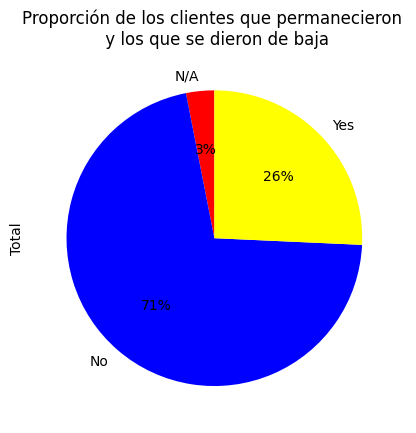

<Figure size 640x480 with 0 Axes>

In [37]:
df1['Total'].plot(kind='pie', autopct='%1.f%%', startangle=90, colors=['red', 'blue','yellow'])
plt.title('Proporción de los clientes que permanecieron \n y los que se dieron de baja')
plt.show()

plt.savefig('grafico_churn.png', dpi=300, bbox_inches='tight')

In [38]:
cliente_evade = df.query('Churn == "Yes"')
cliente_evade

,CustomerID,Churn,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,Contract,...,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,ChargesTotal,ChargesMonthly,DailyCharges
2,0004-TLHLJ,Yes,Male,0,0,0,4,1,0,Month-to-month,...,Fiber optic,0,0,1,0,0,0,280.85,73.90,2.463333
3,0011-IGKFF,Yes,Male,1,1,0,13,1,0,Month-to-month,...,Fiber optic,0,1,1,0,1,1,1237.85,98.00,3.266667
4,0013-EXCHZ,Yes,Female,1,1,0,3,1,0,Month-to-month,...,Fiber optic,0,0,0,1,1,0,267.40,83.90,2.796667
18,0022-TCJCI,Yes,Male,1,0,0,45,1,0,One year,...,DSL,1,0,1,0,0,1,2791.50,62.70,2.090000
19,0023-HGHWL,Yes,Male,1,0,0,1,0,0,Month-to-month,...,DSL,0,0,0,0,0,0,25.10,25.10,0.836667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7243,9961-JBNMK,Yes,Male,1,0,0,21,1,0,Month-to-month,...,Fiber optic,0,0,1,0,1,1,2030.30,96.80,3.226667
7246,9965-YOKZB,Yes,Male,1,0,0,9,1,1,Month-to-month,...,Fiber optic,0,0,0,0,0,1,790.15,83.85,2.795000
7260,9985-MWVIX,Yes,Female,0,0,0,1,1,0,Month-to-month,...,Fiber optic,0,0,0,0,0,0,70.15,70.15,2.338333
7261,9986-BONCE,Yes,Female,0,0,0,4,1,0,Month-to-month,...,No,0,0,0,0,0,0,85.50,20.95,0.698333


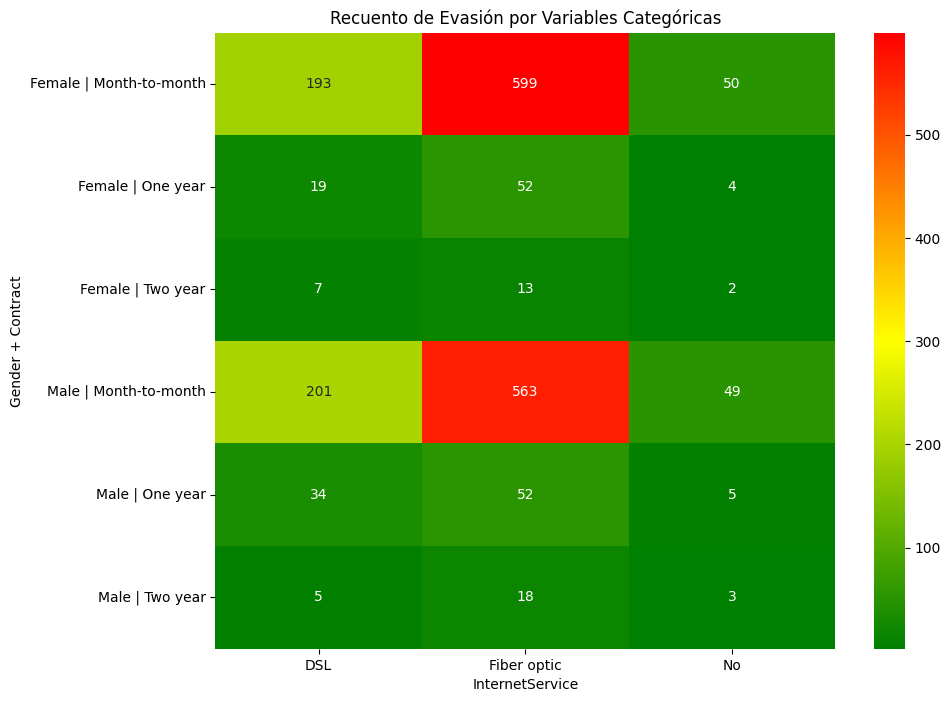

In [42]:
from matplotlib.colors import LinearSegmentedColormap
cliente_evade[['Gender','InternetService','Contract']].value_counts()
cliente_evade = cliente_evade.copy()

cliente_evade['Gender_Contract'] = cliente_evade['Gender'] + " | " + cliente_evade['Contract']

heatmap_data = cliente_evade.groupby(['Gender_Contract', 'InternetService']).size().unstack()

semaforo = LinearSegmentedColormap.from_list("semaforo", ["green", "yellow", "red"])

plt.figure(figsize=(10, 8))

sns.heatmap(heatmap_data, annot=True, fmt='d', cmap=semaforo)
plt.title('Recuento de Evasión por Variables Categóricas')
plt.xlabel('InternetService')
plt.ylabel('Gender + Contract')
plt.show()

In [52]:
df.groupby(['Contract', 'InternetService', 'Gender'])

In [43]:
Variables_numericas = [ 'Churn', 'ChargesMonthly', 'Tenure']

df_evasion_num = df[Variables_numericas].sort_values('Churn').set_index('Churn')
df_evasion_num

,ChargesMonthly,Tenure
Churn,,
N/A,20.65,7
N/A,60.15,51
N/A,106.30,41
N/A,70.30,1
N/A,103.30,19
...,...,...
Yes,82.05,48
Yes,69.85,1
Yes,69.55,1


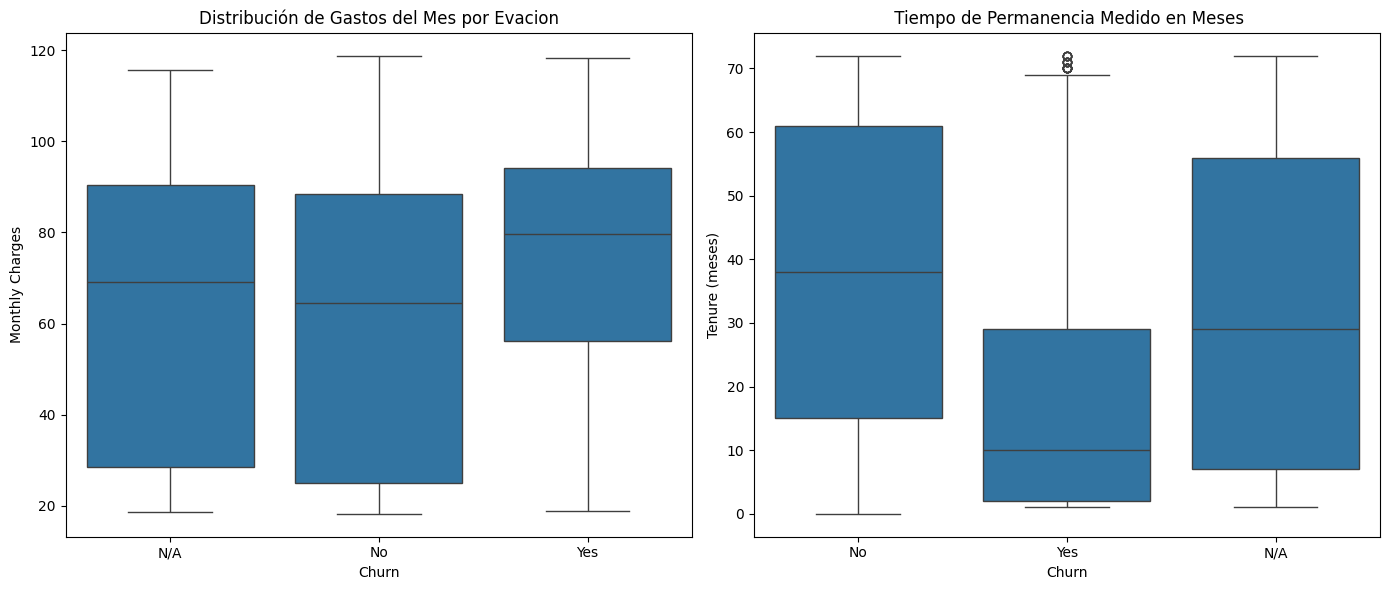

In [45]:
plt.figure(figsize=(14, 6))


plt.subplot(1, 2, 1)
sns.boxplot(data=df_evasion_num, x='Churn', y='ChargesMonthly')
plt.title('Distribución de Gastos del Mes por Evacion')
plt.xlabel('Churn')
plt.ylabel('Monthly Charges')

plt.subplot(1, 2, 2)
sns.boxplot(data=df, x='Churn', y='Tenure')
plt.title(' Tiempo de Permanencia Medido en Meses')
plt.xlabel('Churn')
plt.ylabel('Tenure (meses)')

plt.tight_layout()
plt.show()

In [46]:
df.to_csv("datos_tratados.csv", index=False)

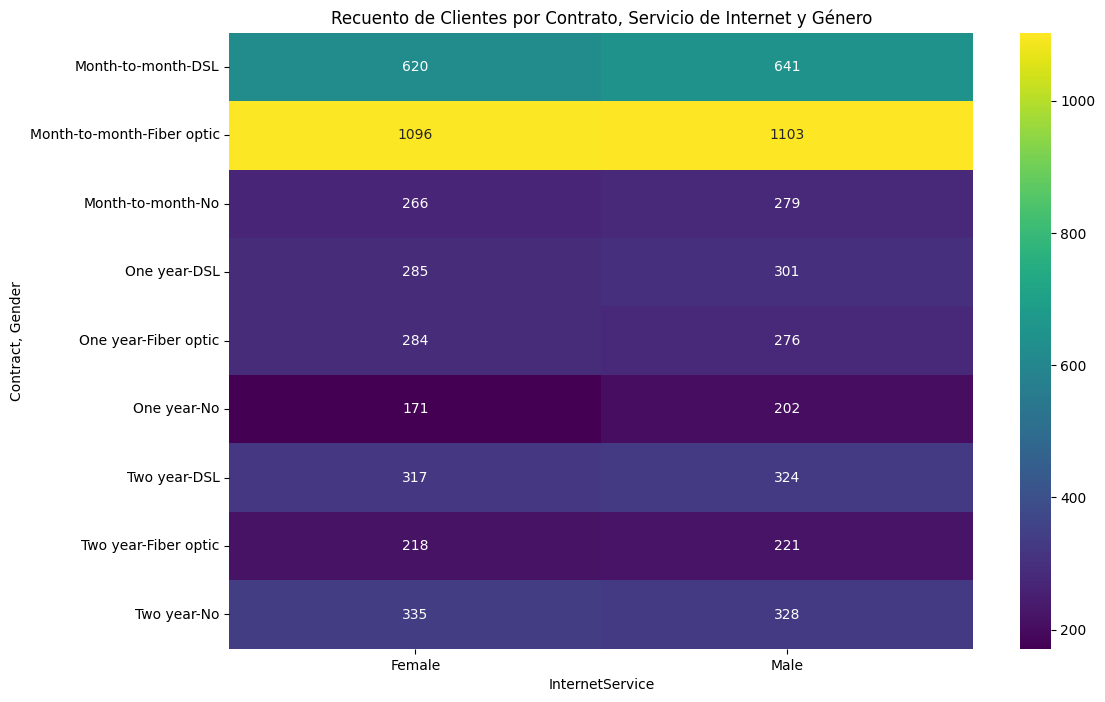

In [69]:
heatmap_data_contract = df.groupby(['Contract', 'InternetService', 'Gender']).size().unstack(fill_value=0)

plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data_contract, annot=True, fmt='d', cmap='viridis')
plt.title('Recuento de Clientes por Contrato, Servicio de Internet y Género')
plt.xlabel('InternetService')
plt.ylabel('Contract, Gender')
plt.show()

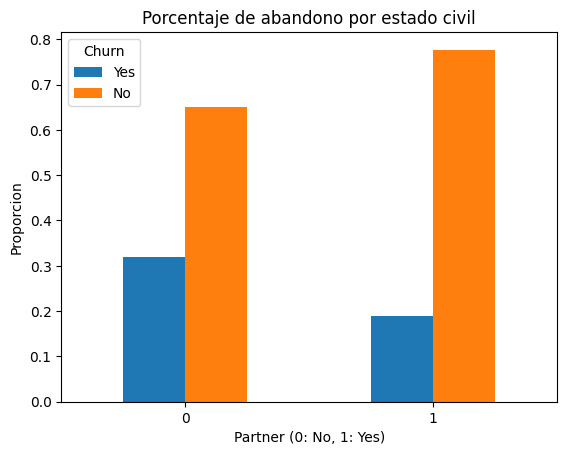

In [67]:
churn_by_partner = df.groupby('Partner')['Churn'].value_counts(normalize=True).unstack().fillna(0)

churn_by_partner[['Yes', 'No']].plot(kind='bar', stacked=False)
plt.title('Porcentaje de abandono por estado civil')
plt.xlabel('Partner (0: No, 1: Yes)')
plt.ylabel('Proporcion')
plt.xticks(rotation=0)
plt.legend(title='Churn')
plt.show()

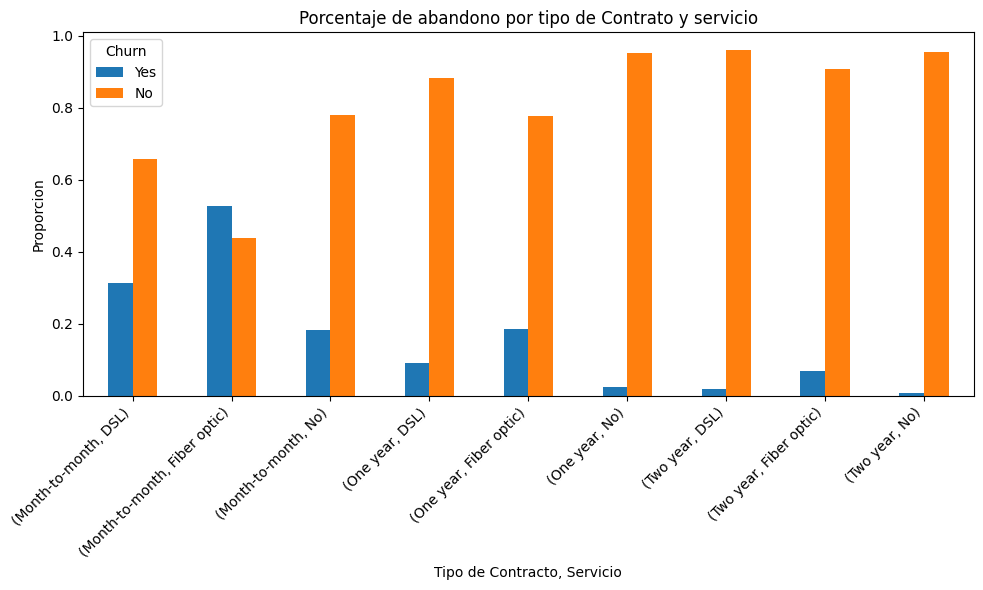

In [66]:
churn_contract_internet = df.groupby(['Contract', 'InternetService'])['ContractChurnBinary'].value_counts(normalize=True).unstack().fillna(0)

churn_contract_internet[[1, 0]].plot(kind='bar', figsize=(10, 6))
plt.title('Porcentaje de abandono por tipo de Contrato y servicio')
plt.xlabel('Tipo de Contracto, Servicio')
plt.ylabel('Proporcion')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Churn', labels=['Yes', 'No'])
plt.tight_layout()
plt.show()

#📄Informe final

1. Extracción: la fuente proporcionada genero error pero como esta integrado Gemini entonces sugirió: https://raw.githubusercontent.com/alura-cursos/challenge2-data-science-LATAM/5adf5f2f87a72bd8b2e854db16e2f2f7c499081a/TelecomX_Data.json



2. Transformación: no hay datos nulos ni duplicados, se renombraro columnas y transformacion a binario.


3. Carga y análisis: se generó gráfico mostrando que una proporción significativa de clientes se dió de baja.

4. Conclusiones:

Los clientes nuevos tienen mayor probabilidad de abandonar en los primeros meses.
El abandono de clientes es mucho más baja cuando los clientes tienen pareja.


Se recomienda hacer promociones dirigidos al mercado meta de casados/convivientes y con contratos de largo plazo.